In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_vectors(vector1, vector2):
    plt.figure(figsize=(12, 6))
    plt.plot(vector1, marker='o', label="Vector 1")
    plt.plot(vector2, marker='o', label="Vector 2", color='orange')
    plt.title("Vector Comparison")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def compute_cost_matrix(vector1, vector2):
    n, m = len(vector1), len(vector2)
    cost_matrix = np.zeros((n, m))
    
    cost_matrix[0, 0] = abs(vector1[0] - vector2[0])
    for i in range(1, n):
        cost_matrix[i, 0] = cost_matrix[i - 1, 0] + abs(vector1[i] - vector2[0])
    for j in range(1, m):
        cost_matrix[0, j] = cost_matrix[0, j - 1] + abs(vector1[0] - vector2[j])
    
    for i in range(1, n):
        for j in range(1, m):
            cost = abs(vector1[i] - vector2[j])
            cost_matrix[i, j] = cost + min(
                cost_matrix[i - 1, j],
                cost_matrix[i, j - 1],
                cost_matrix[i - 1, j - 1]
            )
    
    return cost_matrix

In [4]:
def find_warping_path(cost_matrix):
    n, m = cost_matrix.shape
    i, j = n - 1, m - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(
                cost_matrix[i - 1, j],
                cost_matrix[i, j - 1],
                cost_matrix[i - 1, j - 1]
            )
            if min_cost == cost_matrix[i - 1, j - 1]:
                i -= 1
                j -= 1
            elif min_cost == cost_matrix[i, j - 1]:
                j -= 1
            else:
                i -= 1
        path.append((i, j))
    
    path.reverse()
    return path

In [5]:
def plot_warping_path(cost_matrix, path):
    plt.figure(figsize=(8, 8))
    plt.imshow(cost_matrix, origin='lower', cmap='Blues', interpolation='nearest')
    plt.colorbar(label="Cost")
    plt.title("DTW Accumulated Cost Matrix and Warping Path")
    plt.xlabel("Vector 2 Index")
    plt.ylabel("Vector 1 Index")
    
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, 'r-', label="Warping Path")
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
def dtw_analysis(vector1, vector2):
    # (a) Plot the vectors
    plot_vectors(vector1, vector2)
    # (b, c) Compute DTW cost matrix
    cost_matrix = compute_cost_matrix(vector1, vector2) 
    # (d) Find the warping path
    warping_path = find_warping_path(cost_matrix)    
    # (e) Calculate the DTW distance
    dtw_distance = cost_matrix[-1, -1]    
    # (d) Plot the warping path
    plot_warping_path(cost_matrix, warping_path)    
    return dtw_distance, warping_path

In [7]:
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

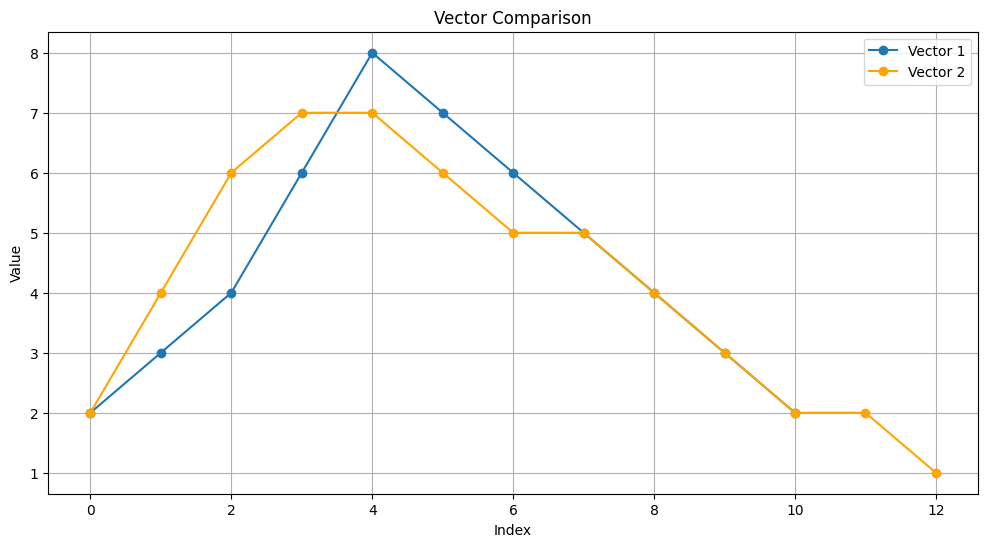

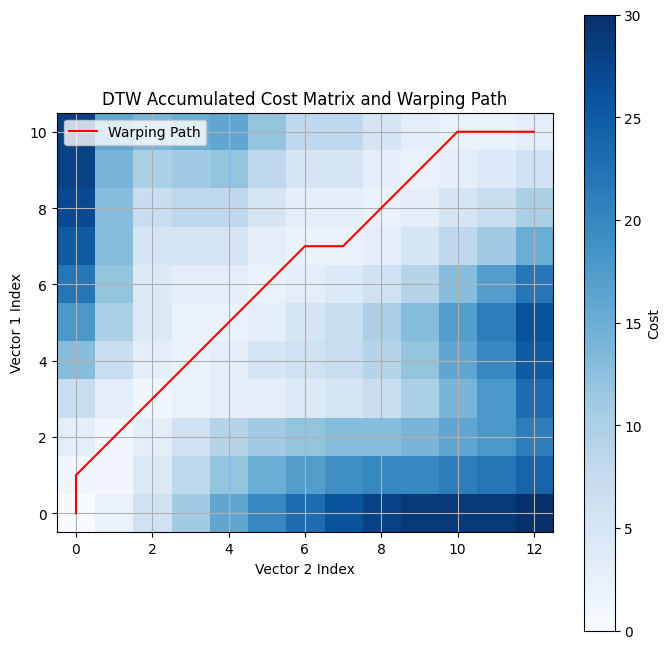

In [8]:
dtw_distance, warping_path = dtw_analysis(vector1, vector2)

In [9]:
print("DTW Distance:", dtw_distance)
print("Warping Path:", warping_path)


DTW Distance: 3.0
Warping Path: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (7, 7), (8, 8), (9, 9), (10, 10), (10, 11), (10, 12)]
